# Plots for validated Data 

In [47]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown
pd.option_context('display.max_columns', -1)
pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution
#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [48]:
#Merge with SModelS DataFrame
dataDF = pd.read_pickle('/home/yoxara/smodels/smodels-database/13TeV/CMS/CMS-EXO-20-008/validation/Simp_data_new.pcl')
#print(dataDF.columns.values.tolist()) #Print all columns names#
dataDF

,filename,mass.5000001,mass.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,run_391_tag_1_1st.slha,5.800000e+03,1.000000e+04,0.000000e+00,1.500000e+00,7.000000e+00,0.000000e+00,1.297820e+02,1.668134e-01,1.668133e-01,1.668127e-01,1.659339e-01,1.297820e+02,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",1.081328e+02,0.000000e+00,1.297821e+02,0.000000e+00,0.000000e+00,5,2.000000e-01,1,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,3.0.0-beta,3.0.0-beta,0.000000e+00,2.164929e+01,1.898400e+00,2.000000e+00,[TRV1bb],"[(y1, 5800.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,1.140397e+01,1.082465e+01,"[(y1, prompt)]"
1,run_392_tag_1_2nd.slha,6.100000e+03,1.000000e+04,0.000000e+00,1.500000e+00,5.000000e-02,0.000000e+00,3.543128e+03,1.667993e-01,1.667992e-01,1.667987e-01,1.660042e-01,3.543128e+03,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",2.952139e+03,0.000000e+00,3.543128e+03,0.000000e+00,0.000000e+00,5,2.000000e-01,1,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,3.0.0-beta,3.0.0-beta,0.000000e+00,5.909892e+02,1.691900e+00,1.609400e+00,[TRV1bb],"[(y1, 6100.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,3.493050e+02,3.672109e+02,"[(y1, prompt)]"
2,run_205_tag_1_1st.slha,3.800000e+03,1.000000e+04,0.000000e+00,1.500000e+00,5.000000e-02,0.000000e+00,4.245573e-01,1.670084e-01,1.670083e-01,1.670069e-01,1.649597e-01,4.245573e-01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",3.536533e-01,0.000000e+00,4.245573e-01,0.000000e+00,0.000000e+00,5,2.000000e-01,1,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,3.0.0-beta,3.0.0-beta,0.000000e+00,7.090400e-02,1.066000e+01,8.875000e+00,[TRV1bb],"[(y1, 3800.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,6.651407e-03,7.989183e-03,"[(y1, prompt)]"
3,run_305_tag_1_2nd.slha,4.900000e+03,1.000000e+04,0.000000e+00,1.500000e+00,6.000000e+00,0.000000e+00,6.215905e+02,1.668722e-01,1.668721e-01,1.668713e-01,1.656400e-01,6.215905e+02,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",5.178649e+02,0.000000e+00,6.215905e+02,0.000000e+00,0.000000e+00,5,2.000000e-01,1,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,Tr

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:e}'.format)
#dataDF = dataDF[dataDF['extpar.3'] > 0.1].reset_index(drop=True)
dataDF

,filename,mass.5000001,mass.5000521,extpar.1,extpar.2,extpar.3,extpar.4,xsec13TeV(fb).5000001,"BRs.y1.q,q","BRs.y1.c,c","BRs.y1.b,b","BRs.y1.t-,t+",totalxsec13TeV(fb),totalxsec8TeV(fb),SMS Decomposition,Total xsec for missing topologies (fb),Total xsec for missing topologies with displaced decays (fb),Total xsec for missing topologies with prompt decays (fb),Total xsec for topologies outside the grid (fb),OutputStatus.sigmacut,OutputStatus.minmassgap,OutputStatus.maxcond,OutputStatus.ncpus,OutputStatus.model,OutputStatus.promptwidth,OutputStatus.stablewidth,OutputStatus.eraseprompt,OutputStatus.checkinput,OutputStatus.doinvisible,OutputStatus.docompress,OutputStatus.computestatistics,OutputStatus.testcoverage,OutputStatus.combinesrs,OutputStatus.reportallsrs,OutputStatus.experimentalfeatures,OutputStatus.file status,OutputStatus.decomposition status,OutputStatus.warnings,OutputStatus.input file,OutputStatus.database version,OutputStatus.smodels version,ExptRes.result0.maxcond,ExptRes.result0.theory prediction (fb),ExptRes.result0.upper limit (fb),ExptRes.result0.expected upper limit (fb),ExptRes.result0.TxNames,ExptRes.result0.Mass (GeV),ExptRes.result0.AnalysisID,ExptRes.result0.DataSetID,ExptRes.result0.AnalysisSqrts (TeV),ExptRes.result0.lumi (fb-1),ExptRes.result0.dataType,ExptRes.result0.r,ExptRes.result0.r_expected,ExptRes.result0.Width (GeV)
0,run_391_tag_1_1st.slha,5.800000e+03,1.000000e+04,0.000000e+00,1.500000e+00,7.000000e+00,0.000000e+00,1.297820e+02,1.668134e-01,1.668133e-01,1.668127e-01,1.659339e-01,1.297820e+02,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",1.081328e+02,0.000000e+00,1.297821e+02,0.000000e+00,0.000000e+00,5,2.000000e-01,1,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,3.0.0-beta,3.0.0-beta,0.000000e+00,2.164929e+01,1.898400e+00,2.000000e+00,[TRV1bb],"[(y1, 5800.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,1.140397e+01,1.082465e+01,"[(y1, prompt)]"
1,run_392_tag_1_2nd.slha,6.100000e+03,1.000000e+04,0.000000e+00,1.500000e+00,5.000000e-02,0.000000e+00,3.543128e+03,1.667993e-01,1.667992e-01,1.667987e-01,1.660042e-01,3.543128e+03,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",2.952139e+03,0.000000e+00,3.543128e+03,0.000000e+00,0.000000e+00,5,2.000000e-01,1,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,3.0.0-beta,3.0.0-beta,0.000000e+00,5.909892e+02,1.691900e+00,1.609400e+00,[TRV1bb],"[(y1, 6100.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,3.493050e+02,3.672109e+02,"[(y1, prompt)]"
2,run_205_tag_1_1st.slha,3.800000e+03,1.000000e+04,0.000000e+00,1.500000e+00,5.000000e-02,0.000000e+00,4.245573e-01,1.670084e-01,1.670083e-01,1.670069e-01,1.649597e-01,4.245573e-01,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",3.536533e-01,0.000000e+00,4.245573e-01,0.000000e+00,0.000000e+00,5,2.000000e-01,1,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,True,True,True,True,False,False,False,1,1,Input file ok,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,3.0.0-beta,3.0.0-beta,0.000000e+00,7.090400e-02,1.066000e+01,8.875000e+00,[TRV1bb],"[(y1, 3800.0)]",CMS-EXO-20-008,NaN,1.300000e+01,1.380000e+02,upperLimit,6.651407e-03,7.989183e-03,"[(y1, prompt)]"
3,run_305_tag_1_2nd.slha,4.900000e+03,1.000000e+04,0.000000e+00,1.500000e+00,6.000000e+00,0.000000e+00,6.215905e+02,1.668722e-01,1.668721e-01,1.668713e-01,1.656400e-01,6.215905e+02,0.000000e+00,"[{'ID': 1, 'SMS': '(PV > y1(1)), (y1(1) > q,q)...",5.178649e+02,0.000000e+00,6.215905e+02,0.000000e+00,0.000000e+00,5,2.000000e-01,1,/home/yoxara/CMS-EXO-20-008/validation/slhaFil...,1.000000e-11,1.000000e-25,"eCharge,colordim",True,Tr

#### Set r = 0 for points with no results 

In [50]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)


#### Define exclusions

In [51]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [52]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))


Total number of points = 1514
Total excluded (LHC) = 897
Total allowed = 617



### Create analysis label for excluded points

In [53]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


In [54]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(897, 57)


In [55]:
for label in nexcluded[:,1]:
    print(label+': %i'%len(excluded[excluded['label'] == label]))
    

CMS-EXO-20-008 (TRV1bb): 897


In [56]:
MY1 = [1.80E+03, 1.90E+03, 2.00E+03, 2.10E+03, 2.20E+03, 2.30E+03, 2.40E+03, 2.50E+03, 2.60E+03, 2.70E+03, 2.80E+03, 2.90E+03, 3.00E+03, 3.10E+03, 3.20E+03, 3.30E+03, 3.40E+03, 3.50E+03, 3.60E+03, 3.70E+03, 3.80E+03, 3.90E+03, 4.00E+03, 4.10E+03, 4.20E+03, 4.30E+03, 4.40E+03, 4.50E+03, 4.60E+03, 4.70E+03, 4.80E+03, 4.90E+03, 5.00E+03, 5.10E+03, 5.20E+03, 5.30E+03, 5.40E+03, 5.50E+03, 5.60E+03, 5.70E+03, 5.80E+03, 5.90E+03, 6.00E+03, 6.10E+03, 6.20E+03, 6.30E+03, 6.40E+03, 6.50E+03, 6.60E+03, 6.70E+03, 6.80E+03, 6.90E+03, 7.00E+03, 7.10E+03, 7.20E+03, 7.30E+03, 7.40E+03, 7.50E+03, 7.60E+03, 7.70E+03, 7.80E+03, 7.90E+03, 8.00E+03]
xsecObs_pb = [0.04067800000, 0.02229700000, 0.02551300000, 0.02227900000, 0.02119600000, 0.01975100000, 0.01921200000, 0.03255700000, 0.03853000000, 0.03760600000, 0.02766000000, 0.02358600000, 0.01769200000, 0.01376400000, 0.01657700000, 0.01321300000, 0.01103100000, 0.00820210000, 0.00810640000, 0.00937090000, 0.01066000000, 0.00922260000, 0.00665420000, 0.00546970000, 0.00451500000, 0.00418690000, 0.00457350000, 0.00434910000, 0.00424710000, 0.00371870000, 0.00486840000, 0.00467260000, 0.00436120000, 0.00382360000, 0.00311030000, 0.00266610000, 0.00241030000, 0.00211430000, 0.00192090000, 0.00191000000, 0.00189840000, 0.00182450000, 0.00183210000, 0.00169190000, 0.00155210000, 0.00149780000, 0.00141390000, 0.00126500000, 0.00113230000, 0.00101450000, 0.00090710000, 0.00077800000, 0.00066950000, 0.00058850000, 0.00051980000, 0.00046250000, 0.00042260000, 0.00039520000, 0.00037820000, 0.00036970000, 0.00037320000, 0.00039080000, 0.00040690000]
xsecObs_fb = [x * 1000 for x in xsecObs_pb]
xsecExp_pb = [0.05125000000, 0.04062500000, 0.03537500000, 0.03137500000, 0.02825000000, 0.02550000000, 0.02325000000, 0.02125000000, 0.01950000000, 0.01793800000, 0.01656200000, 0.01537500000, 0.01431200000, 0.01331200000, 0.01256200000, 0.01178100000, 0.01109400000, 0.01050000000, 0.00993750000, 0.00940620000, 0.00887500000, 0.00840620000, 0.00790620000, 0.00737500000, 0.00690620000, 0.00640620000, 0.00595310000, 0.00551560000, 0.00512500000, 0.00476560000, 0.00442190000, 0.00409380000, 0.00379690000, 0.00351560000, 0.00323440000, 0.00299220000, 0.00275000000, 0.00254690000, 0.00235160000, 0.00217190000, 0.00200000000, 0.00186720000, 0.00172660000, 0.00160940000, 0.00149610000, 0.00139450000, 0.00130470000, 0.00121880000, 0.00114060000, 0.00107030000, 0.00100390000, 0.00094140000, 0.00088670000, 0.00083980000, 0.00079300000, 0.00074800000, 0.00070900000, 0.00067380000, 0.00064060000, 0.00060940000, 0.00058200000, 0.00055660000, 0.00053320000]
xsecExp_fb = [x * 1000 for x in xsecExp_pb]


In [57]:
dataDF['extpar.3'].unique()

array([7.   , 0.15 , 1.5  , 0.4  , 1.   , 0.1  , 0.05 , 0.5  , 0.099,
       6.   , 0.3  , 0.092, 0.085, 0.8  , 0.25 , 0.075, 5.   , 0.7  ,
       0.2  , 0.06 , 4.   , 3.   , 2.5  , 2.   ])

In [58]:
dataDF = dataDF[~((dataDF['extpar.3'] == 4.000000e-01) & (dataDF['mass.5000001'] >= 6500) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 5.000000e-01) & (dataDF['mass.5000001'] >= 6700) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 7.000000e-01) & (dataDF['mass.5000001'] >= 7000) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 8.000000e-01) & (dataDF['mass.5000001'] >= 7200) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 1.000000e-00) & (dataDF['mass.5000001'] >= 7400) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 1.500000e-00) & (dataDF['mass.5000001'] >= 7800) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 5.000000e-02) & (dataDF['mass.5000001'] >= 4400) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 6.000000e-02) & (dataDF['mass.5000001'] >= 4700) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 7.500000e-02) & (dataDF['mass.5000001'] >= 4900) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 8.500000e-02) & (dataDF['mass.5000001'] >= 5100) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 9.200000e-02) & (dataDF['mass.5000001'] >= 5100) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 9.900000e-02) & (dataDF['mass.5000001'] >= 5200) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 1.000000e-01) & (dataDF['mass.5000001'] >= 5200) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 1.500000e-01) & (dataDF['mass.5000001'] >= 5600) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 2.000000e-01) & (dataDF['mass.5000001'] >= 5900) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 2.500000e-01) & (dataDF['mass.5000001'] >= 6100) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)
dataDF = dataDF[~((dataDF['extpar.3'] == 3.000000e-01) & (dataDF['mass.5000001'] >= 6300) & (dataDF['mass.5000001'] <= 8000))].reset_index(drop=True)


### Define colors and plotting order

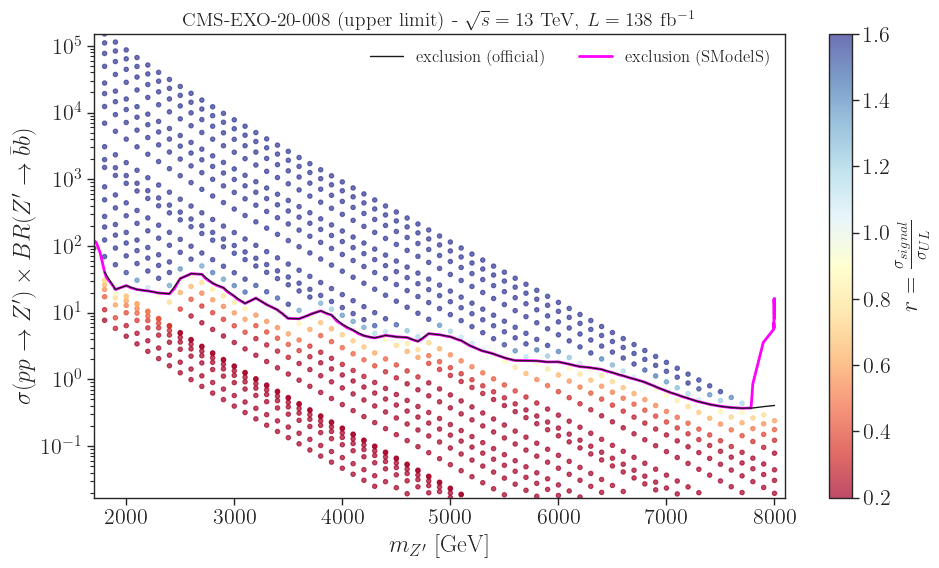

In [59]:
from scipy.interpolate import griddata, RectBivariateSpline


cm = plt.colormaps['RdYlBu']

plt.figure(figsize=(10,6))

dataDF = dataDF.reset_index(drop=True)


x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']

order = c.argsort()
x, y, c = x.iloc[order], y.iloc[order], c.iloc[order]
sc = plt.scatter(x, y, c=c, s=10, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.7)
levels = [1.0]  
cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
#xi = np.linspace(min(x), max(x), 2000)
#yi = np.linspace(min(y), max(y), 3000)
#xi, yi = np.meshgrid(xi, yi)
#zi = griddata((x, y), c, (xi, yi), method='linear')
#cs = plt.contour(xi, yi, zi, levels=[1.0], colors='magenta', linestyles='solid')

smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
observed_line, = plt.plot(MY1, xsecObs_fb, 'k', linewidth=1, label='exclusion (official)')

plt.legend(handles=[observed_line, smodels_proxy], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$')
plt.xlim(1700, 8100)
#plt.ylim(1e-02, 1e04)
plt.yscale('log')
#plt.xscale('log')
plt.title('CMS-EXO-20-008 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 138$ fb$^{-1}$', fontsize=14)
          #- Leptophobic $Z^{\prime}$ model (vector)', fontsize=14)
plt.tight_layout()
plt.show()

In [60]:

x_observed = np.array(MY1)
y_observed = np.array(xsecObs_fb)

x_cs = np.array(cs.allsegs[0][0][:, 0])  
y_cs = np.array(cs.allsegs[0][0][:, 1]) 

x_common = np.linspace(min(x_observed.min(), x_cs.min()), max(x_observed.max(), x_cs.max()), num=100)

interp_observed = interp1d(x_observed, y_observed, kind='linear', fill_value="extrapolate")
interp_cs = interp1d(x_cs, y_cs, kind='linear', fill_value="extrapolate")

y_observed_interp = interp_observed(x_common)
y_cs_interp = interp_cs(x_common)

tasa_cambio_observed_cs = np.diff(y_observed_interp) / np.diff(x_common)

tasa_cambio_observed_cs

array([-1.83810000e-01, -1.83810000e-01, -1.83810000e-01, -1.83810000e-01,
       -1.06024172e-01,  3.21600000e-02, -2.02966615e-02, -2.66098748e-02,
       -1.08300000e-02, -1.34346100e-02, -1.28860855e-02, -5.39000000e-03,
        8.14862794e-02,  1.27637809e-01,  5.97300000e-02,  2.30411729e-02,
       -9.24000000e-03, -9.81125995e-02, -7.37302252e-02, -4.07400000e-02,
       -5.69614659e-02, -5.21690702e-02, -3.92800000e-02,  1.44803706e-02,
        1.26488778e-02, -3.36400000e-02, -2.53218259e-02, -2.28346575e-02,
       -2.82890000e-02, -1.16175410e-02, -9.90789594e-05,  1.26450000e-02,
        1.27719815e-02,  1.28910000e-02, -1.35368855e-02, -1.91514466e-02,
       -2.56840000e-02, -1.35676642e-02, -1.10898013e-02, -9.54700000e-03,
       -4.64858585e-03, -1.60247723e-03,  3.86600000e-03, -3.37490249e-04,
       -2.07131696e-03, -1.02000000e-03, -3.55363849e-03, -4.49017705e-03,
        1.14970000e-02,  4.76389143e-03, -1.95800000e-03, -3.06027931e-03,
       -4.03382146e-03, -

In [61]:
dataDF['ExptRes.result0.r_expected']

0      2.809299e+03
1      2.060018e+03
2      2.945480e+03
3      2.457726e+03
4      2.128293e+03
           ...     
1143   5.081957e-03
1144   4.509991e-03
1145   4.457762e-03
1146            NaN
1147            NaN
Name: ExptRes.result0.r_expected, Length: 1148, dtype: float64

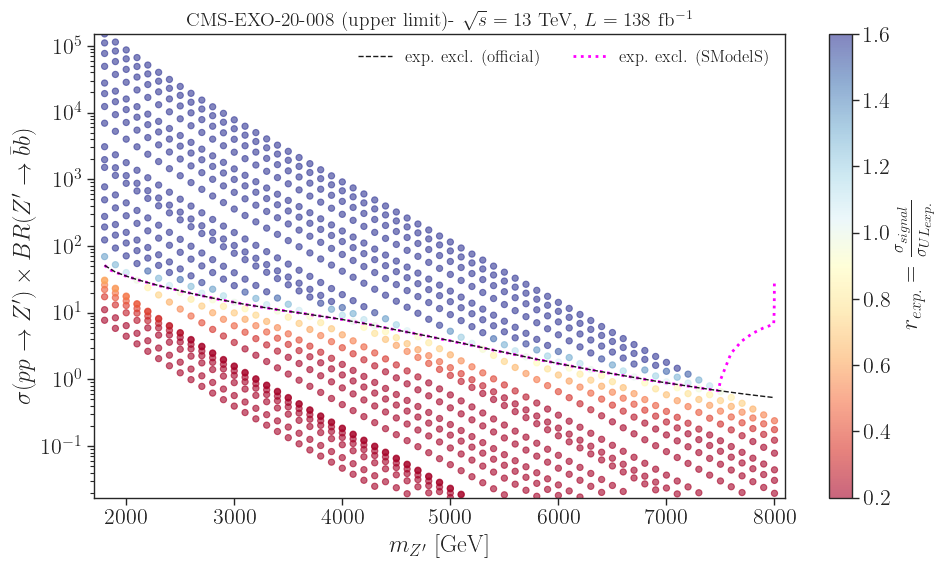

In [62]:
plt.figure(figsize=(10,6))



x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']
ce = dataDF['ExptRes.result0.r_expected']


order = c.argsort()
x, y, c, ce = x.iloc[order], y.iloc[order], c.iloc[order], ce.iloc[order]
sc = plt.scatter(x, y, c=ce, s=20, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.6)

mask = np.isfinite(ce)

x, y, ce = x[mask], y[mask], ce[mask]

levels = [1.0]  
cs_exp = plt.tricontour(x, y, ce, levels=levels, colors='magenta', linestyles=':', linewidths=2.)
smodels_proxyE = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle=':', label='exp. excl. (SModelS)')
Expected_line, = plt.plot(MY1, xsecExp_fb, 'k--', linewidth=1, label='exp. excl. (official)')

plt.legend(handles=[Expected_line, smodels_proxyE], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r_{exp.} = \frac{\sigma_{signal}}{\sigma_{UL_{exp.}}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$')
plt.xlim(1700, 8100)
plt.yscale('log')
#plt.xscale('log')
plt.title('CMS-EXO-20-008 (upper limit)- $\sqrt{s} = 13$ TeV, $L = 138$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.show()


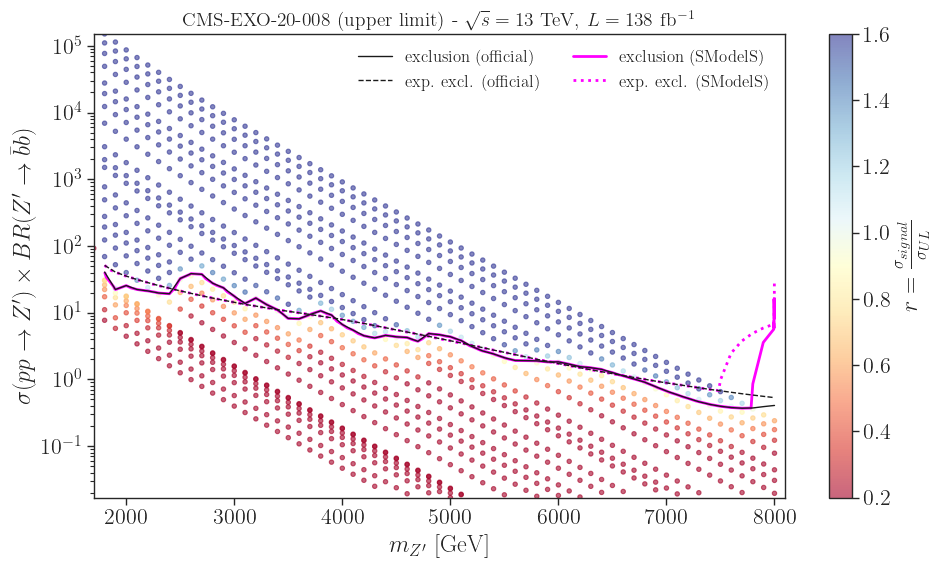

In [67]:
plt.figure(figsize=(10,6))

x = dataDF['mass.5000001']
y = dataDF['xsec13TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']
ce = dataDF['ExptRes.result0.r_expected']

order = c.argsort()
x, y, c, ce = x.iloc[order], y.iloc[order], c.iloc[order], ce.iloc[order]
sc = plt.scatter(x, y, c=c, s=10, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.6)

mask = np.isfinite(ce) & np.isfinite(c)
x, y, c, ce = x[mask], y[mask], c[mask], ce[mask]




#xi = np.linspace(x.min(), x.max(), 4000)
#log_yi = np.linspace(np.log10(y.min()), np.log10(y.max()), 4000)
#xi, log_yi = np.meshgrid(xi, log_yi)
#zi = griddata((x, np.log10(y)), c, (xi, log_yi), method='cubic')
#zie = griddata((x, np.log10(y)), ce, (xi, log_yi), method='cubic')
#yi = 10**log_yi
#cs = plt.contour(xi, yi, zi, levels=levels, colors='magenta', linestyles='solid', linewidths=2)
#cs_exp = plt.contour(xi, yi, zie, levels=levels, colors='magenta', linestyles=':', linewidths=2)


levels = [1.0]  
cs_exp = plt.tricontour(x, y, ce, levels=levels, colors='magenta', linestyles=':', linewidths=2.)

cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)



observed_line, = plt.plot(MY1, xsecObs_fb, 'k', linewidth=1, label='exclusion (official)')
Expected_line, = plt.plot(MY1, xsecExp_fb, 'k--', linewidth=1, label='exp. excl. (official)')
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
smodels_proxyE = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle=':', label='exp. excl. (SModelS)')

plt.legend(handles=[observed_line, Expected_line, smodels_proxy, smodels_proxyE], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$')
plt.xlim(1700, 8100)
plt.yscale('log')
#plt.xscale('log')
plt.title('CMS-EXO-20-008 (upper limit) - $\sqrt{s} = 13$ TeV, $L = 138$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.savefig('CMS-EXO-20-008_xsec_UL.png')
plt.show()

In [64]:
dataDF['xsec13TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])


0      1.141278e+05
1      8.368821e+04
2      1.509558e+05
3      8.694207e+04
4      6.677520e+04
           ...     
1143   2.080451e-02
1144   1.994273e-02
1145   1.692568e-02
1146   9.254509e+01
1147   1.248752e+02
Length: 1148, dtype: float64

In [65]:
0.092 +0.005 

0.097

In [66]:
dataDF['ExptRes.result0.theory prediction (fb)']

0      1.141278e+05
1      8.368821e+04
2      1.509558e+05
3      8.694207e+04
4      6.677520e+04
           ...     
1143   2.080451e-02
1144   1.994273e-02
1145   1.692568e-02
1146            NaN
1147            NaN
Name: ExptRes.result0.theory prediction (fb), Length: 1148, dtype: float64